importing libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loading our csv files 

In [0]:
#loading our csv files and previewing the first 10 rows
url = '/content/data.csv'
df = pd.read_csv(url, encoding='latin1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Previewing information about our dataset.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [0]:
df.shape

(541909, 8)

DATA CLEANING 

Completeness 

In [0]:
#checking for null values in the datasets
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [0]:
#dropping the null values
df1=df.dropna()

In [0]:
df1.shape

(406829, 8)

In [0]:
# changing the InvoiceDate to to_datetime data type
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#splitting datetime to date and time
df1['date'] = [d.date() for d in df1.InvoiceDate]
df1['time'] = [d.time() for d in df1.InvoiceDate]
df1['date'] = pd.to_datetime(df1['date'])
df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S:%f', errors = 'ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   date         406829 non-null  datetime64[ns]
 9   time         406829 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 34.1+ MB


In [0]:
# splitting  time to hours, minutes and seconds.
df1[['h','m','s']] = df1['time'].astype(str).str.split(':', expand=True).astype(int)

print (df1)

       InvoiceNo StockCode                          Description  ...   h   m  s
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  ...   8  26  0
1         536365     71053                  WHITE METAL LANTERN  ...   8  26  0
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER  ...   8  26  0
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  ...   8  26  0
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  ...   8  26  0
...          ...       ...                                  ...  ...  ..  .. ..
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS  ...  12  50  0
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL   ...  12  50  0
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL   ...  12  50  0
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE  ...  12  50  0
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT   ...  12  50  0

[406829 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
# splitting date to year,month and the day
df1[['yy','mm','dd']] = df1['date'].astype(str).str.split('-', expand=True).astype(int)

print (df1)



       InvoiceNo StockCode                          Description  ...    yy  mm  dd
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  ...  2010  12   1
1         536365     71053                  WHITE METAL LANTERN  ...  2010  12   1
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER  ...  2010  12   1
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  ...  2010  12   1
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  ...  2010  12   1
...          ...       ...                                  ...  ...   ...  ..  ..
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS  ...  2011  12   9
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL   ...  2011  12   9
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL   ...  2011  12   9
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE  ...  2011  12   9
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT   ...  2011  12   9

[40

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
#creating a dataframe without cancelled transactions.
df3=df1[~(df1.InvoiceNo.str.startswith('C'))]

In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   date         397924 non-null  datetime64[ns]
 9   time         397924 non-null  object        
 10  h            397924 non-null  int64         
 11  m            397924 non-null  int64         
 12  s            397924 non-null  int64         
 13  yy           397924 non-null  int64         
 14  mm           397924 non-null  int64         
 15  dd           397924 non-null  int6

In [0]:
df3.head()

In [0]:
#creating a new column for the total expenditure, quantity*unitprice
df3['Total Expenditure']=df3.Quantity * df3.UnitPrice


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


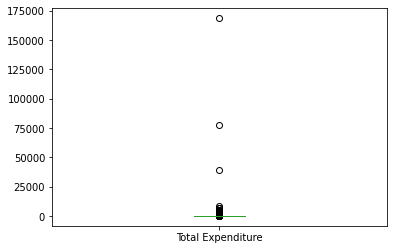

In [0]:
#checking for outliers from our total expenditure column using a boxplot
import matplotlib.pyplot as pit
% matplotlib inline
df3.boxplot(column = ["Total Expenditure"],grid = False)

Finding the cancelled transactions

In [0]:
#craeting a dataframe that has only cancelled transactions
df4 = df1[df1.InvoiceNo.str.startswith('C')]

In [0]:
#previewing our dataframe
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,h,m,s,yy,mm,dd
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,09:41:00,9,41,0,2010,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,09:49:00,9,49,0,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,10:24:00,10,24,0,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,10,24,0,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,10,24,0,2010,12,1


In [0]:
#counting the cancelled transactions 
df4.count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
date           8905
time           8905
h              8905
m              8905
s              8905
yy             8905
mm             8905
dd             8905
dtype: int64

**DATA ANALYSIS**

1) Which is the peak month of the year? ,, Which is the most popular day for purchases?  which is the most popular hour in the most popular day.

i) which is the peak month of the year

In [0]:
df3.groupby(['mm'])['Total Expenditure'].sum().sort_values(ascending = False)

mm
11    1161817.380
12    1090906.680
10    1039318.790
9      952838.382
5      678594.560
6      661213.690
8      645343.900
7      600091.011
3      595500.760
1      569445.040
4      469200.361
2      447137.350
Name: Total Expenditure, dtype: float64

ii) The most popular day in the most popular month.

In [0]:
#creating a  dataframe of the 11th month only.
df10=df3[df3.mm==11]

In [0]:
#finding the most popular day.
df10.groupby(['dd'])['Total Expenditure'].sum().sort_values(ascending=False)

dd
23    71979.93
10    70513.29
9     61489.18
3     60672.11
14    58777.71
4     56099.24
17    55885.30
28    51831.67
22    49664.89
29    48851.68
16    48439.76
15    47729.00
21    45333.13
6     42941.34
30    41481.23
2     38734.70
24    38579.11
8     38295.12
11    37081.37
18    36751.25
20    30190.92
1     29132.81
7     28779.24
13    28607.78
25    26674.66
27    17300.96
Name: Total Expenditure, dtype: float64

iii) the most popular hour in the most popular day of the most popular month.

In [0]:
# creating a dataframe where the day is on 23rd
df8= df10[df10.dd==23]

In [0]:
#finding the most popular hour.
df8.groupby(['h'])['Total Expenditure'].sum().sort_values(ascending=False)

h
10    15110.39
15    13532.78
13    12391.22
12     8042.83
11     6933.32
16     5912.26
14     5063.84
9      2048.70
8      1972.62
17      971.97
Name: Total Expenditure, dtype: float64

2) Which product is most popularly bought in the United Kingdom, France and Germany?Which are the top three countries? Which item has brought in most returns? Overall and in the individual countries? Is the most popular product

In [0]:
#Finding out the number of products sold
df3.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
PINK POLKADOT KIDS BAG                   1
BLACK 3 BEAD DROP EARRINGS               1
CRYSTAL CHANDELIER T-LIGHT HOLDER        1
BLACK CHERRY LIGHTS                      1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: StockCode, Length: 3877, dtype: int64

In [0]:
#Finding out the number of goods sold to each country 
df3.groupby('Country')['StockCode'].count().sort_values(ascending=False)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [0]:
#Creating the new dataframe with countries as the United Kingdom
df5=df3[df3.Country=='United Kingdom']

In [0]:
#Counting the different products sold in the United Kingdom
df5.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
WHITE HANGING HEART T-LIGHT HOLDER     1940
JUMBO BAG RED RETROSPOT                1464
REGENCY CAKESTAND 3 TIER               1426
ASSORTED COLOUR BIRD ORNAMENT          1333
PARTY BUNTING                          1308
                                       ... 
SET/3 TALL GLASS CANDLE HOLDER PINK       1
GLASS AND BEADS BRACELET IVORY            1
GLASS AND PAINTED BEADS BRACELET OL       1
BAKING MOULD CUPCAKE CHOCOLATE            1
LETTER "O" BLING KEY RING                 1
Name: StockCode, Length: 3844, dtype: int64

In [0]:
#Creating a new dataframe with the country as France
df6=df3[df3.Country=='France']

In [0]:
#Counting the different products sold in France
df6.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
POSTAGE                             300
RABBIT NIGHT LIGHT                   73
RED TOADSTOOL LED NIGHT LIGHT        70
PLASTERS IN TIN WOODLAND ANIMALS     68
PLASTERS IN TIN CIRCUS PARADE        66
                                   ... 
METAL MERRY CHRISTMAS WREATH          1
MEDIUM PINK BUDDHA HEAD               1
MEASURING TAPE BABUSHKA RED           1
MEASURING TAPE BABUSHKA BLUE          1
 50'S CHRISTMAS GIFT BAG LARGE        1
Name: StockCode, Length: 1544, dtype: int64

In [0]:
#Creating a new dataframe with the country as Germany
df7=df3[df3.Country=='Germany']

In [0]:
#Counting the different products sold in Germany
df7.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
POSTAGE                                374
ROUND SNACK BOXES SET OF4 WOODLAND     113
ROUND SNACK BOXES SET OF 4 FRUITS       72
PLASTERS IN TIN WOODLAND ANIMALS        64
REGENCY CAKESTAND 3 TIER                63
                                      ... 
DANISH ROSE PHOTO FRAME                  1
I'M ON HOLIDAY METAL SIGN                1
DARK BIRD HOUSE TREE DECORATION          1
MEDIUM MEDINA STAMPED METAL BOWL         1
CHRISTMAS GINGHAM HEART                  1
Name: StockCode, Length: 1697, dtype: int64

In [0]:
#Getting the product that had the highest returns
df3.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
PAPER CRAFT , LITTLE BIRDIE            168469.60000
PICNIC BASKET WICKER 60 PIECES          19809.75000
TEA TIME TEA TOWELS                      3022.50000
MISELTOE HEART WREATH CREAM               996.00000
DOTCOM POSTAGE                            744.14750
                                           ...     
CHAMPAGNE TRAY BLANK CARD                   0.76000
SET 12 COLOURING PENCILS DOILEY             0.65000
60 GOLD AND SILVER FAIRY CAKE CASES         0.55000
HEN HOUSE W CHICK IN NEST                   0.42000
PADS TO MATCH ALL CUSHIONS                  0.00075
Name: Total Expenditure, Length: 3877, dtype: float64

In [0]:
#Getting the product with the highest returns in the United Kingdom
df5=df3[df3.Country=='United Kingdom']
df5.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
PAPER CRAFT , LITTLE BIRDIE            168469.60000
PICNIC BASKET WICKER 60 PIECES          19809.75000
TEA TIME TEA TOWELS                      3022.50000
DOTCOM POSTAGE                            744.14750
HALL CABINET WITH 3 DRAWERS               625.88250
                                           ...     
CHAMPAGNE TRAY BLANK CARD                   0.76000
WINE BOTTLE DRESSING LT.BLUE                0.76000
60 GOLD AND SILVER FAIRY CAKE CASES         0.55000
HEN HOUSE W CHICK IN NEST                   0.42000
PADS TO MATCH ALL CUSHIONS                  0.00075
Name: Total Expenditure, Length: 3844, dtype: float64

In [0]:
#Getting the product with the highest returns in France
df6=df3[df3.Country=='France']
df6.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
Manual                                1582.061667
MINI WOODEN HAPPY BIRTHDAY GARLAND     835.200000
PINK HAPPY BIRTHDAY BUNTING            232.500000
PINK PAINTED KASHMIRI CHAIR            171.800000
JUMBO BAG STRAWBERRY                   132.766667
                                         ...     
TRAVEL CARD WALLET VINTAGE ROSE          0.420000
TRAVEL CARD WALLET RETRO PETALS          0.420000
MIXED NUTS LIGHT GREEN BOWL              0.420000
GLITTER HEART DECORATION                 0.390000
BLUE EGG  SPOON                          0.360000
Name: Total Expenditure, Length: 1544, dtype: float64

In [0]:
#Getting the product with the most sales in Germany
df7=df3[df3.Country=='Germany']
df7.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
STOOL HOME SWEET HOME               318.250000
SET OF 16 VINTAGE BLACK CUTLERY     262.800000
Manual                              255.138889
COLOURING PENCILS BROWN TUBE        212.000000
REGENCY CAKESTAND 3 TIER            143.840476
                                       ...    
FOLKART ZINC HEART CHRISTMAS DEC      0.850000
SANDALWOOD FAN                        0.850000
CHERUB HEART DECORATION GOLD          0.830000
SWALLOW SQUARE TISSUE BOX             0.390000
ROUND CAKE TIN VINTAGE GREEN          0.000000
Name: Total Expenditure, Length: 1697, dtype: float64

3) Which items have brought in the least returns? Overall and in the individual countries?               Does the least popular product bring in the least returns?

i)Getting products with the least returns overall

In [0]:
#Getting the products with the least returns overall
df3.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
PADS TO MATCH ALL CUSHIONS                  0.00075
HEN HOUSE W CHICK IN NEST                   0.42000
60 GOLD AND SILVER FAIRY CAKE CASES         0.55000
SET 12 COLOURING PENCILS DOILEY             0.65000
CHAMPAGNE TRAY BLANK CARD                   0.76000
                                           ...     
DOTCOM POSTAGE                            744.14750
MISELTOE HEART WREATH CREAM               996.00000
TEA TIME TEA TOWELS                      3022.50000
PICNIC BASKET WICKER 60 PIECES          19809.75000
PAPER CRAFT , LITTLE BIRDIE            168469.60000
Name: Total Expenditure, Length: 3877, dtype: float64

In [0]:
#Getting the product with the least returns in the United Kingdom
df5.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
PADS TO MATCH ALL CUSHIONS                  0.00075
HEN HOUSE W CHICK IN NEST                   0.42000
60 GOLD AND SILVER FAIRY CAKE CASES         0.55000
WINE BOTTLE DRESSING LT.BLUE                0.76000
CHAMPAGNE TRAY BLANK CARD                   0.76000
                                           ...     
HALL CABINET WITH 3 DRAWERS               625.88250
DOTCOM POSTAGE                            744.14750
TEA TIME TEA TOWELS                      3022.50000
PICNIC BASKET WICKER 60 PIECES          19809.75000
PAPER CRAFT , LITTLE BIRDIE            168469.60000
Name: Total Expenditure, Length: 3844, dtype: float64

In [0]:
#Getting the product with the least returns in France
df6.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
BLUE EGG  SPOON                          0.360000
GLITTER HEART DECORATION                 0.390000
MIXED NUTS LIGHT GREEN BOWL              0.420000
TRAVEL CARD WALLET RETRO PETALS          0.420000
TRAVEL CARD WALLET VINTAGE ROSE          0.420000
                                         ...     
JUMBO BAG STRAWBERRY                   132.766667
PINK PAINTED KASHMIRI CHAIR            171.800000
PINK HAPPY BIRTHDAY BUNTING            232.500000
MINI WOODEN HAPPY BIRTHDAY GARLAND     835.200000
Manual                                1582.061667
Name: Total Expenditure, Length: 1544, dtype: float64

In [0]:
#Getting the product with the least returns in Germany
df7.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
ROUND CAKE TIN VINTAGE GREEN          0.000000
SWALLOW SQUARE TISSUE BOX             0.390000
CHERUB HEART DECORATION GOLD          0.830000
SANDALWOOD FAN                        0.850000
FOLKART ZINC HEART CHRISTMAS DEC      0.850000
                                       ...    
REGENCY CAKESTAND 3 TIER            143.840476
COLOURING PENCILS BROWN TUBE        212.000000
Manual                              255.138889
SET OF 16 VINTAGE BLACK CUTLERY     262.800000
STOOL HOME SWEET HOME               318.250000
Name: Total Expenditure, Length: 1697, dtype: float64

In [0]:
#Counting the least sold products overall
df3.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
PINK BAROQUE FLOCK CANDLE HOLDER         1
BLACK CHERRY LIGHTS                      1
CRYSTAL CHANDELIER T-LIGHT HOLDER        1
BLACK 3 BEAD DROP EARRINGS               1
PINK POLKADOT KIDS BAG                   1
                                      ... 
PARTY BUNTING                         1397
ASSORTED COLOUR BIRD ORNAMENT         1408
JUMBO BAG RED RETROSPOT               1618
REGENCY CAKESTAND 3 TIER              1724
WHITE HANGING HEART T-LIGHT HOLDER    2028
Name: Total Expenditure, Length: 3877, dtype: int64

In [0]:
#Counting the least sold products in the United Kingdom
df5.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
LETTER "O" BLING KEY RING                 1
BAKING MOULD CUPCAKE CHOCOLATE            1
GLASS AND PAINTED BEADS BRACELET OL       1
GLASS AND BEADS BRACELET IVORY            1
SET/3 TALL GLASS CANDLE HOLDER PINK       1
                                       ... 
PARTY BUNTING                          1308
ASSORTED COLOUR BIRD ORNAMENT          1333
REGENCY CAKESTAND 3 TIER               1426
JUMBO BAG RED RETROSPOT                1464
WHITE HANGING HEART T-LIGHT HOLDER     1940
Name: Total Expenditure, Length: 3844, dtype: int64

In [0]:
#Counting the least sold products in the France
df6.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
 50'S CHRISTMAS GIFT BAG LARGE        1
MEASURING TAPE BABUSHKA BLUE          1
MEASURING TAPE BABUSHKA RED           1
MEDIUM PINK BUDDHA HEAD               1
METAL MERRY CHRISTMAS WREATH          1
                                   ... 
PLASTERS IN TIN CIRCUS PARADE        66
PLASTERS IN TIN WOODLAND ANIMALS     68
RED TOADSTOOL LED NIGHT LIGHT        70
RABBIT NIGHT LIGHT                   73
POSTAGE                             300
Name: Total Expenditure, Length: 1544, dtype: int64

In [0]:
#Counting the least sold products in Germany
df7.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
CHRISTMAS GINGHAM HEART                  1
MEDIUM MEDINA STAMPED METAL BOWL         1
DARK BIRD HOUSE TREE DECORATION          1
I'M ON HOLIDAY METAL SIGN                1
DANISH ROSE PHOTO FRAME                  1
                                      ... 
REGENCY CAKESTAND 3 TIER                63
PLASTERS IN TIN WOODLAND ANIMALS        64
ROUND SNACK BOXES SET OF 4 FRUITS       72
ROUND SNACK BOXES SET OF4 WOODLAND     113
POSTAGE                                374
Name: Total Expenditure, Length: 1697, dtype: int64

4) Which products are more likely to have cancelling issues? The country with the highest cancelling issues,the popular product cancelled least and the highest

In [0]:
#creating a new column cost that is the unitprice*quantity
df4['cost']=df4.Quantity * df4.UnitPrice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# i) Country with the highest cancelling issue
df4.groupby(['Country'])['cost'].sum().sort_values(ascending=True )

Country
United Kingdom       -540518.16
EIRE                  -15260.68
France                -12311.21
Singapore             -12158.90
Germany                -7168.93
Spain                  -6802.53
Portugal               -4380.08
Japan                  -2075.75
USA                    -1849.47
Sweden                 -1782.42
Australia              -1444.04
Norway                 -1001.98
Netherlands             -784.80
Switzerland             -704.55
Cyprus                  -644.09
Italy                   -592.73
Channel Islands         -364.15
Belgium                 -285.38
Israel                  -227.44
Malta                   -220.12
Finland                 -219.34
Denmark                 -187.20
Poland                  -121.51
Czech Republic          -119.02
Greece                   -50.00
Austria                  -44.36
Saudi Arabia             -14.75
European Community        -8.50
Name: cost, dtype: float64

In [0]:
# ii) The most cancelled product
df4.groupby(['Description'])['Quantity'].sum().sort_values(ascending=True)

Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
Manual                                 -3995
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
                                       ...  
BLACK BAROQUE WALL CLOCK                  -1
RECYCLED ACAPULCO MAT TURQUOISE           -1
RECYCLED ACAPULCO MAT PINK                -1
BLACK HEART CARD HOLDER                   -1
FUNKY WASHING UP GLOVES ASSORTED          -1
Name: Quantity, Length: 1945, dtype: int64

In [0]:
# iii) The least cancelled product
df4.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)

Description
FUNKY WASHING UP GLOVES ASSORTED          -1
BLACK HEART CARD HOLDER                   -1
RECYCLED ACAPULCO MAT PINK                -1
RECYCLED ACAPULCO MAT TURQUOISE           -1
BLACK BAROQUE WALL CLOCK                  -1
                                       ...  
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
Manual                                 -3995
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
MEDIUM CERAMIC TOP STORAGE JAR        -74494
PAPER CRAFT , LITTLE BIRDIE           -80995
Name: Quantity, Length: 1945, dtype: int64

5) Which country do we have the most customers from? Is it the country bringing the most revenue? ,What is the average expenditure of a consumer in the the given countries.

In [0]:
#changing country to string datatype to allow for grouping
df3["Country"] = df3["Country"].astype("str")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#the country with the most customers
df3.groupby (['Country'])['CustomerID'].count().sort_values(ascending= False)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [0]:
#country bringing in the most revenue?
df3['Total Expenditure'].groupby(df3['Country']).sum().sort_values(ascending=False)

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

In [0]:
#mean expenditure of each consumer per country
df3['Total Expenditure'].groupby([df3['Country'],df3['CustomerID']]).mean()

Country         CustomerID
Australia       12386.0        40.190000
                12388.0        27.806600
                12393.0        24.728125
                12415.0       174.461634
                12422.0        18.390476
                                 ...    
United Kingdom  18287.0        26.246857
Unspecified     12363.0        24.000000
                12743.0         4.077836
                14265.0        17.102581
                16320.0        18.543929
Name: Total Expenditure, Length: 4347, dtype: float64

In [0]:
#mean expenditure per country
df3['Total Expenditure'].groupby(df3['Country']).mean().sort_values(ascending = False)

Country
Netherlands             120.798282
Australia               116.895620
Japan                   116.561900
Singapore                95.852658
Sweden                   85.096075
Denmark                  49.882474
Lithuania                47.458857
Lebanon                  37.641778
EIRE                     36.687745
Brazil                   35.737500
Norway                   33.736418
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Bahrain                  32.258824
Switzerland              30.642752
Israel                   29.119718
United Arab Emirates     27.974706
Channel Islands          27.340160
Austria                  25.624824
Germany                  25.311562
France                   25.056827
Spain                    24.779521
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy                    23.064960
Portugal                 22.872702
Poland      